## Introduction:
Analyzing Olympics data on medals, athletes, and GDP provides a comprehensive overview of how economic and social factors influence global sports.
This project will contain the participation trends of the athletes and see if each is being representedequally. Each trend will have a comparison between the Summer and Winter Olympics datasets,and it will give insights into how the medals are distributed across each country.

## Objective 1
**To analyze Olympic medal distribution and identify the top 10 countries with the most medals over the last 20 years.**

In [243]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

## Data Preprocessing 

In [169]:
#load dataset
athletes_df = pd.read_csv('athletes_dataset.csv') ## represents the athlete dataset
medalists_df= pd.read_csv('medalists_dataset.csv') ## represents medalists dataset

In [171]:
# preview of athlete dataset
athletes_df.head()

,id,name,gender,born,died,height,weight,team,game,noc,sport,event,medal
0,131892,Meryem Erdoğan,Female,24 April 1990,NaN,172 cm,55 kg,Türkiye,2016 Summer Olympics,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",NaN
1,131892,Meryem Erdoğan,Female,24 April 1990,NaN,172 cm,55 kg,Türkiye,2020 Summer Olympics,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",NaN
2,131892,Meryem Erdoğan,Female,24 April 1990,NaN,172 cm,55 kg,Türkiye,2020 Summer Olympics,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",NaN
3,4300,Maurice Maina,Male,1 January 1963,NaN,158 cm,47 kg,Kenya,1988 Summer Olympics,KEN,Boxing,"Boxing, Light-Flyweight, Men(Olympic)",NaN
4,4300,Maurice Maina,Male,1 January 1963,NaN,158 cm,47 kg,Kenya,1988 Summer Olympics,KEN,Boxing,"Boxing, Light-Flyweight, Men(Olympic)",NaN


In [173]:
# from game column separate year and type from game and removing spaces from before and after the type extraction.
athletes_df['year'] = athletes_df['game'].str.extract(r'(\d{4})')  # Extract year (4-digit number)
athletes_df['type'] = athletes_df['game'].str.extract(r'(\D+)$')  # Extract type (non-digit characters)

# Remove spaces from 'type' column
athletes_df['type'] = athletes_df['type'].str.strip()
athletes_df.head()


,id,name,gender,born,died,height,weight,team,game,noc,sport,event,medal,year,type
0,131892,Meryem Erdoğan,Female,24 April 1990,NaN,172 cm,55 kg,Türkiye,2016 Summer Olympics,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",NaN,2016,Summer Olympics
1,131892,Meryem Erdoğan,Female,24 April 1990,NaN,172 cm,55 kg,Türkiye,2020 Summer Olympics,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",NaN,2020,Summer Olympics
2,131892,Meryem Erdoğan,Female,24 April 1990,NaN,172 cm,55 kg,Türkiye,2020 Summer Olympics,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",NaN,2020,Summer Olympics
3,4300,Maurice Maina,Male,1 January 1963,NaN,158 cm,47 kg,Kenya,1988 Summer Olympics,KEN,Boxing,"Boxing, Light-Flyweight, Men(Olympic)",NaN,1988,Summer Olympics
4,4300,Maurice Maina,Male,1 January 1963,NaN,158 cm,47 kg,Kenya,1988 Summer Olympics,KEN,Boxing,"Boxing, Light-Flyweight, Men(Olympic)",NaN,1988,Summer Olympics


In [175]:
# Dropping duplicates based on specific columns and keeping the first occurrence
# also to ensure that only one medal per team is considered (even if multiple team members win medals)
athletes_df = athletes_df.drop_duplicates(subset=['team','id', 'name', 'gender', 'born', 'died', 'height', 'weight', 'game', 'noc', 'sport', 'event', 'medal', 'year', 'type'], keep='first')

# also drop columns that are not needed in analysis.
## dropping born ,died, height, weight colums as not needed in analysis.
columns_to_drop = ['born', 'died', 'height', 'weight','game','gender']
for column in columns_to_drop:
    if column in athletes_df.columns:
        athletes_df = athletes_df.drop(columns=column)
# Display the first few rows after removing duplicates
athletes_df.head()

,id,name,team,noc,sport,event,medal,year,type
0,131892,Meryem Erdoğan,Türkiye,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",NaN,2016,Summer Olympics
1,131892,Meryem Erdoğan,Türkiye,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",NaN,2020,Summer Olympics
3,4300,Maurice Maina,Kenya,KEN,Boxing,"Boxing, Light-Flyweight, Men(Olympic)",NaN,1988,Summer Olympics
5,60239,Stanislav Tůma,Czechoslovakia,TCH,Wrestling,"Wrestling, Featherweight, Freestyle, Men(Olympic)",NaN,1972,Summer Olympics
7,129369,Eunice Kirwa,Bahrain,BRN,Athletics,"Athletics, Marathon, Women(Olympic)",Silver,2016,Summer Olympics


In [177]:
athletes_df.shape

(318961, 9)

In [179]:
# Remove rows where the 'medal' column is empty or NaN
athletes_df = athletes_df.dropna(subset=['medal'])

# If 'medal' has empty strings or non-NaN blanks, you can filter them out like this:
#athletes_df = athletes_df[athletes_df['medal'].str.strip() != '']

# Display the first few rows after removing rows without medals
athletes_df.head()

,id,name,team,noc,sport,event,medal,year,type
7,129369,Eunice Kirwa,Bahrain,BRN,Athletics,"Athletics, Marathon, Women(Olympic)",Silver,2016,Summer Olympics
22,101764,Park Hye-Won,Republic of Korea,KOR,Short Track Speed Skating (Skating),"Short Track Speed Skating (Skating), 3,000 met...",Gold,2002,Winter Olympics
39,59207,Lee Jeong-Geun,Republic of Korea,KOR,Wrestling,"Wrestling, Featherweight, Freestyle, Men(Olympic)",Bronze,1984,Summer Olympics
63,37709,Kerstin Müller,Germany,GER,Rowing,"Rowing, Quadruple Sculls, Women(Olympic)",Gold,1992,Summer Olympics
65,7999,Laurie Stevens,South Africa,RSA,Boxing,"Boxing, Lightweight, Men(Olympic)",Gold,1932,Summer Olympics


In [181]:
# checking for the null columns count
athletes_df.isnull().sum()

id       0
name     0
team     0
noc      0
sport    0
event    0
medal    0
year     0
type     0
dtype: int64

In [183]:
athletes_df.shape

(44202, 9)

In [ ]:
## Data Cleaning on medalists dataset

In [185]:
#preview of 2nd dataset -medalist dataset
medalists_df.head()

,medal_date,medal_type,medal_code,name,gender,country_code,country,country_long,nationality_code,nationality,...,team,team_gender,discipline,event,event_type,url_event,birth_date,code_athlete,code_team,is_medallist
0,2024-07-27,Gold Medal,1.0,EVENEPOEL Remco,Male,BEL,Belgium,Belgium,BEL,Belgium,...,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,2000-01-25,1903136,NaN,True
1,2024-07-27,Silver Medal,2.0,GANNA Filippo,Male,ITA,Italy,Italy,ITA,Italy,...,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1996-07-25,1923520,NaN,True
2,2024-07-27,Bronze Medal,3.0,van AERT Wout,Male,BEL,Belgium,Belgium,BEL,Belgium,...,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1994-09-15,1903147,NaN,True
3,2024-07-27,Gold Medal,1.0,BROWN Grace,Female,AUS,Australia,Australia,AUS,Australia,...,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1992-07-07,1940173,NaN,True
4,2024-07-27,Silver Medal,2.0,HENDERSON Anna,Female,GBR,Great Britain,Great Britain,GBR,Great Britain,...,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1998-11-14,1912525,NaN,True


In [187]:
# change columns names:
#medal_date to year only , medal_type to medal,country_code to noc, and add one column named type and valuesin there 'Summer Olympics' 

# Renaming column 
medalists_df = medalists_df.rename(columns={
    'medal_date': 'year',
    'medal_type': 'medal',
    'country_code': 'noc',
    'code_athlete': 'id',
    'discipline':'sport'
})

# Extract the year from 'year' (previously 'medal_date') column
medalists_df['year'] = medalists_df['year'].str[:4]

# Add a new column 'type' with the value 'Summer Olympics'
medalists_df['type'] = 'Summer Olympics'.strip()



In [189]:
# also in medal column remove 'Medal' from each value -
#example- Gold Medal to Gold.

medalists_df['medal'] = medalists_df['medal'].str.split().str[0]

medalists_df.head()

,year,medal,medal_code,name,gender,noc,country,country_long,nationality_code,nationality,...,team_gender,sport,event,event_type,url_event,birth_date,id,code_team,is_medallist,type
0,2024,Gold,1.0,EVENEPOEL Remco,Male,BEL,Belgium,Belgium,BEL,Belgium,...,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,2000-01-25,1903136,NaN,True,Summer Olympics
1,2024,Silver,2.0,GANNA Filippo,Male,ITA,Italy,Italy,ITA,Italy,...,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1996-07-25,1923520,NaN,True,Summer Olympics
2,2024,Bronze,3.0,van AERT Wout,Male,BEL,Belgium,Belgium,BEL,Belgium,...,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1994-09-15,1903147,NaN,True,Summer Olympics
3,2024,Gold,1.0,BROWN Grace,Female,AUS,Australia,Australia,AUS,Australia,...,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1992-07-07,1940173,NaN,True,Summer Olympics
4,2024,Silver,2.0,HENDERSON Anna,Female,GBR,Great Britain,Great Britain,GBR,Great Britain,...,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1998-11-14,1912525,NaN,True,Summer Olympics


In [191]:
medalists_df.isnull().sum()

year                  0
medal                 0
medal_code            1
name                  0
gender                0
noc                   0
country               0
country_long          0
nationality_code      1
nationality           1
nationality_long      1
team                760
team_gender         760
sport                 0
event                 0
event_type            0
url_event            21
birth_date            0
id                    0
code_team           760
is_medallist          0
type                  0
dtype: int64

In [193]:
# dropping columns that are not used in analysis
columns_to_keep = ['id', 'name', 'team', 'noc', 'sport', 'event', 'medal', 'year', 'type']

# Drop the rest of the columns
medalists_df = medalists_df[columns_to_keep]

# Display the resulting DataFrame
medalists_df.head()

,id,name,team,noc,sport,event,medal,year,type
0,1903136,EVENEPOEL Remco,NaN,BEL,Cycling Road,Men's Individual Time Trial,Gold,2024,Summer Olympics
1,1923520,GANNA Filippo,NaN,ITA,Cycling Road,Men's Individual Time Trial,Silver,2024,Summer Olympics
2,1903147,van AERT Wout,NaN,BEL,Cycling Road,Men's Individual Time Trial,Bronze,2024,Summer Olympics
3,1940173,BROWN Grace,NaN,AUS,Cycling Road,Women's Individual Time Trial,Gold,2024,Summer Olympics
4,1912525,HENDERSON Anna,NaN,GBR,Cycling Road,Women's Individual Time Trial,Silver,2024,Summer Olympics


In [195]:
medalists_df.shape

(2315, 9)

In [197]:
# medalist identify the duplicates keeping the first row based on mentioned subsets.
medalists_df=medalists_df.drop_duplicates(subset=['year','medal','noc','team','sport','event','type'],keep='first')


In [199]:
medalists_df.shape

(1044, 9)

In [201]:
medalists_df.isnull().sum()

id         0
name       0
team     760
noc        0
sport      0
event      0
medal      0
year       0
type       0
dtype: int64

In [203]:
# check if there are any duplictae rows
duplicate_rows = medalists_df[medalists_df.duplicated(keep=False)]

# Display the duplicate rows if any
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


## Data Integration
#### Merging cleaned datasets 
**This merging is important because the atheletes_df only consists of data till 2023 and the medalists_df have the 2024 olympics data.**
                                                        

In [205]:
# Combine the two DataFrames
Olympics_medalists_data = pd.concat([athletes_df, medalists_df], ignore_index=True)

# Optionally, you might want to sort the data by a specific column (e.g., date)
Olympics_medalists_data.sort_values(by='year', inplace=True)

# Save the combined DataFrame to a new file
Olympics_medalists_data.to_csv('Olympics_medalists_data.csv', index=False)

print("Data combined successfully!")
Olympics_medalists_data.head()

Data combined successfully!


,id,name,team,noc,sport,event,medal,year,type
13389,22382,Leon Pyrgos,Greece,GRE,Fencing,"Fencing, Foil, Masters, Individual, Men(Olympic)",Gold,1896,Summer Olympics
12490,226,Momcsilló Tapavicza,Hungary,HUN,Tennis,"Tennis, Singles, Men(Olympic)",Bronze,1896,Summer Olympics
21284,15116,Georgios Koletis,Greece,GRE,Cycling Track (Cycling),"Cycling Track (Cycling), 100 kilometres, Men(O...",Silver,1896,Summer Olympics
16041,30338,Dimitrios Loundras,Greece,GRE,Artistic Gymnastics (Gymnastics),"Artistic Gymnastics (Gymnastics), Parallel Bar...",Bronze,1896,Summer Olympics
5827,68538,Alexandre Tuffèri,France Greece,FRA,Athletics,"Athletics, Triple Jump, Men(Olympic)",Silver,1896,Summer Olympics


In [207]:
Olympics_medalists_data.shape

(45246, 9)

In [209]:
Olympics_medalists_data.isnull().sum()

id         0
name       0
team     760
noc        0
sport      0
event      0
medal      0
year       0
type       0
dtype: int64

#### Since the analysis was focused on the last 20 years of Olympic history, filtered both datasets to only include medals won between 2004 and 2024. This allows to focus on the most recent competitions and accurately reflect modern Olympic trends.

In [211]:
# filter dataset from year 2004 to 2024
Olympics_medalists_data['year'] = pd.to_numeric(Olympics_medalists_data['year'], errors='coerce')
filtered_dataset = Olympics_medalists_data[(Olympics_medalists_data['year'] >= 2004) & (Olympics_medalists_data['year'] <= 2024)]
filtered_dataset.head()
#filtered_dataset.shape

,id,name,team,noc,sport,event,medal,year,type
32497,105037,Novlene Williams-Mills,Jamaica,JAM,Athletics,"Athletics, 4 × 400 metres Relay, Women(Olympic)",Bronze,2004,Summer Olympics
30180,18983,Björn Emmerling,Germany,GER,Hockey,"Hockey, Hockey, Men(Olympic)",Bronze,2004,Summer Olympics
37049,93233,Crystl Bustos,United States,USA,Softball (Baseball/Softball),"Softball (Baseball/Softball), Softball, Women(...",Gold,2004,Summer Olympics
37023,105898,Zhou Mi,People's Republic of China,CHN,Badminton,"Badminton, Singles, Women(Olympic)",Bronze,2004,Summer Olympics
35921,104444,Sergey Fedorovtsev,Russian Federation,RUS,Rowing,"Rowing, Quadruple Sculls, Men(Olympic)",Gold,2004,Summer Olympics


##  Exploratory Data Analysis (EDA):
Two separate visualization on the Winter and Summer Olympics Given that the Summer and Winter Olympics.

In [213]:
## separating summer and winter olympics
summer_olympics = filtered_dataset[filtered_dataset['type'] == 'Summer Olympics']
print("Summer Olympics Data:")
print(summer_olympics.head())


winter_olympics = filtered_dataset[filtered_dataset['type'] == 'Winter Olympics']
print("Winter Olympics Data:")
print(winter_olympics.head())

Summer Olympics Data:
           id                    name                        team  noc  \
32497  105037  Novlene Williams-Mills                     Jamaica  JAM   
30180   18983         Björn Emmerling                     Germany  GER   
37049   93233           Crystl Bustos               United States  USA   
37023  105898                 Zhou Mi  People's Republic of China  CHN   
35921  104444      Sergey Fedorovtsev          Russian Federation  RUS   

                              sport  \
32497                     Athletics   
30180                        Hockey   
37049  Softball (Baseball/Softball)   
37023                     Badminton   
35921                        Rowing   

                                                   event   medal  year  \
32497    Athletics, 4 × 400 metres Relay, Women(Olympic)  Bronze  2004   
30180                       Hockey, Hockey, Men(Olympic)  Bronze  2004   
37049  Softball (Baseball/Softball), Softball, Women(...    Gold  2004   
37

For Summer Olympics

In [217]:

summer_olympics = summer_olympics.copy()
summer_olympics.loc[summer_olympics['noc'] == 'ROC', 'noc'] = 'RUS'

# Create a rule where we count only one medal per team for team events
# We will group by both 'noc' and 'event' to count only one medal per event per country (NOC)
summer_medal_counts = summer_olympics.drop_duplicates(subset=['noc', 'event', 'medal'])  # Remove duplicates in team events
summer_medal_counts = summer_medal_counts.groupby('noc')['medal'].count().reset_index().sort_values(by='medal', ascending=False)
summer_medal_counts.head()

,noc,medal
123,USA,467
21,CHN,342
44,GBR,277
100,RUS,257
42,FRA,213


In [219]:
# for the winter olympics.

winter_olympics = winter_olympics.copy()

# Create a rule where we count only one medal per team for team events
# We will group by both 'noc' and 'event' to count only one medal per event per country (NOC)
winter_medal_counts = winter_olympics.drop_duplicates(subset=['noc', 'event', 'medal'])  # Remove duplicates in team events
winter_medal_counts = winter_medal_counts.groupby('noc')['medal'].count().reset_index().sort_values(by='medal', ascending=False)
winter_medal_counts.head 


<bound method NDFrame.head of     noc  medal
33  USA    100
23  NOR     95
5   CAN     94
14  GER     90
1   AUT     63
31  SWE     60
27  RUS     59
29  SUI     49
12  FRA     46
16  ITA     44
22  NED     43
26  ROC     42
6   CHN     41
19  KOR     39
17  JPN     35
11  FIN     28
8   CZE     26
28  SLO     18
25  POL     16
0   AUS     13
3   BLR     11
13  GBR     11
30  SVK      8
20  LAT      7
7   CRO      5
32  UKR      5
24  NZL      5
10  EST      5
15  HUN      4
9   ESP      3
2   BEL      3
18  KAZ      3
4   BUL      1
21  LIE      1>

In [221]:
print("Top 10n countries for Summer Olympics:")
print(summer_medal_counts.head(10))

print("\nTop 10n countries for Winter Olympics:")
print(winter_medal_counts.head(10))

Top 10n countries for Summer Olympics:
     noc  medal
123  USA    467
21   CHN    342
44   GBR    277
100  RUS    257
42   FRA    213
6    AUS    212
46   GER    202
63   JPN    190
60   ITA    164
67   KOR    131

Top 10n countries for Winter Olympics:
    noc  medal
33  USA    100
23  NOR     95
5   CAN     94
14  GER     90
1   AUT     63
31  SWE     60
27  RUS     59
29  SUI     49
12  FRA     46
16  ITA     44


In [229]:
# colur coding for ecah country
# Unique country codes and corresponding colors
unique_country_code = summer_medal_counts['noc'].unique()
color_code = [
    "#FF6633", "#FFB399", "#FF33FF", "#FFFF99", "#00B3E6",
    "#E6B333", "#3366E6", "#999966", "#99FF99", "#B34D4D",
    "#80B300", "#809900", "#E6B3B3", "#6680B3", "#66991A",
    "#FF99E6", "#CCFF1A", "#FF1A66", "#E6331A", "#33FFCC",
    "#66994D", "#B366CC", "#4D8000", "#B33300", "#CC80CC",
    "#66664D", "#991AFF", "#E666FF", "#4DB3FF", "#1AB399",
    "#E666B3", "#33991A", "#CC9999", "#B3B31A", "#00E680",
    "#4D8066", "#809980", "#E6FF80", "#1AFF33", "#999933",
    "#FF3380", "#CCCC00", "#66E64D", "#4D80CC", "#9900B3",
    "#E64D66", "#4DB380", "#FF4D4D", "#99E6E6", "#6666FF",
    "#003366", "#663399", "#FF6666", "#66CCFF", "#669999",
    "#FF9966", "#66FF33", "#CC3333", "#FFCC00", "#336666",
    "#33CCCC", "#99CC33", "#FF66CC", "#99CCCC", "#996699",
    "#FF99CC", "#CCCC99", "#9999CC", "#33CC66", "#FF6666",
    "#3366FF", "#9999FF", "#666633", "#CC9966", "#663333",
    "#3399FF", "#FF9966", "#FF6699", "#33FF99", "#6699FF",
    "#9966FF", "#FF9966", "#669933", "#99FF66", "#33FFCC",
    "#9933FF", "#99FFCC", "#33CCFF", "#9966CC", "#FF9933",
    "#66FF99", "#FFCC99", "#99CCFF", "#996633"
]

# Map the country codes to colors
#color_dict = {code: color_code[i] for i, code in enumerate(unique_country_code)}
color_dict = {code: color_code[i % len(color_code)] for i, code in enumerate(unique_country_code)}
# Assign colors to the dataframe based on country codes
summer_medal_counts['color'] = summer_medal_counts['noc'].map(color_dict)


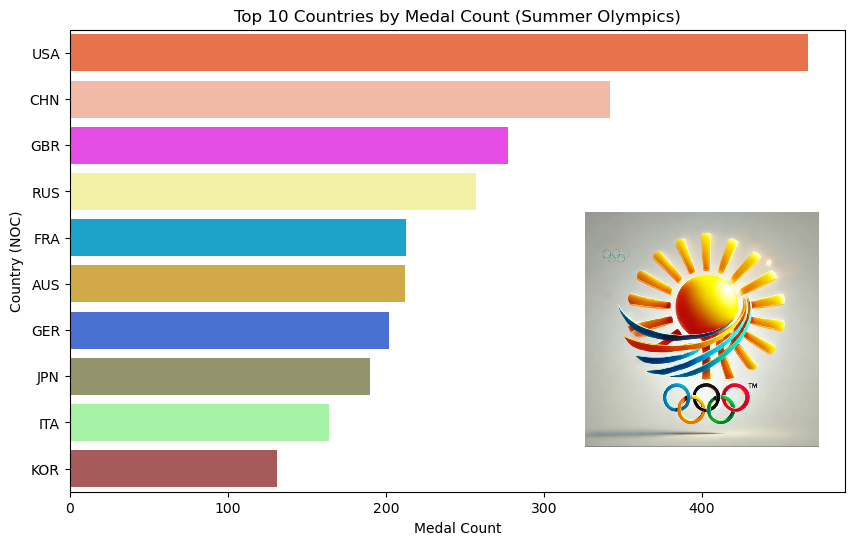

In [245]:
## let's visualize this

# Plot for Summer Olympics

# Plot with custom colors for countries
plt.figure(figsize=(10, 6))

# Get the top 10 countries
top_10_countries = summer_medal_counts.head(10)

#Extract colors for the top 10 countries from the color dictionary
colors = [color_dict[country] for country in top_10_countries['noc']]

sns.barplot(x='medal', y='noc', data=top_10_countries, hue='noc', palette=colors, legend=False)

plt.title('Top 10 Countries by Medal Count (Summer Olympics)')
plt.xlabel('Medal Count')
plt.ylabel('Country (NOC)')

# Load and place the image
img = mpimg.imread('summerlogo.png')  # Replace with correct path to your image
imagebox = OffsetImage(img, zoom=0.3)
ab = AnnotationBbox(imagebox, (400, 6), xycoords='data', frameon=False)
ax = plt.gca()
ax.add_artist(ab)

#plt.tight_layout()
plt.show()

This chart shows the top 10 countries in terms of medal count at the Summer Olympics. The **United States is the clear leader** with over 450 medals. **China comes in second place** with around 350 medals. **Great Britain is in third place** with around 275 medals. The remaining countries in the top 10 are Russia, France, Australia, Germany, Japan, Italy and South Korea. It's worth noting that **Russia's medal count has been decreasing in recent years, likely due to the country's involvement in doping scandals**.
The chart is accompanied by a graphic of the Olympic rings and the sun which is the logo of the Summer Olympics.

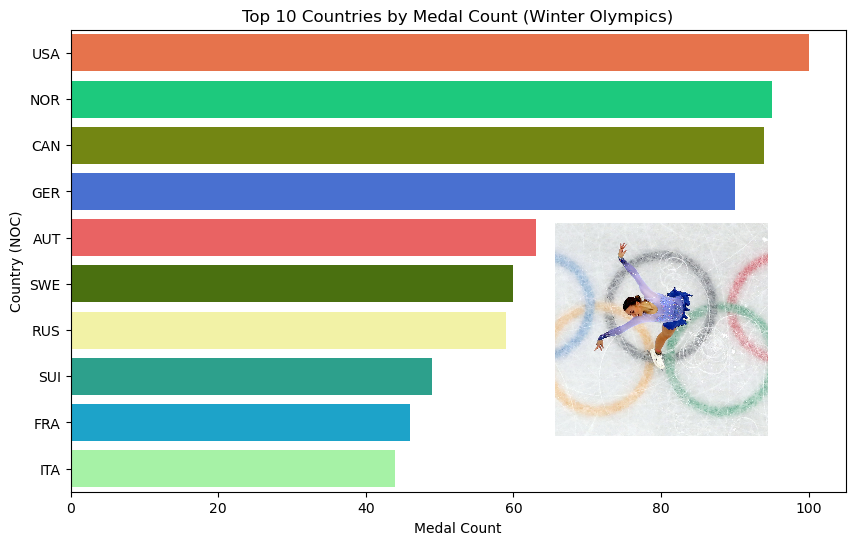

In [247]:
## plot for the winter top 10 medalist countries

# Plot with custom colors for countries
plt.figure(figsize=(10, 6))
sns.barplot(x='medal', y='noc', data=winter_medal_counts.head(10), palette=[color_dict[code] for code in winter_medal_counts.head(10)['noc']], hue='noc', legend=False)
plt.title('Top 10 Countries by Medal Count (Winter Olympics)')
plt.xlabel('Medal Count')
plt.ylabel('Country (NOC)')

img2 = mpimg.imread('winterlogo.jpg')

# Create the image object and place it on the bar chart
imagebox = OffsetImage(img2, zoom=0.1)
ab2 = AnnotationBbox(imagebox, (80, 6), xycoords='data', frameon=False)
ax2 = plt.gca()
# Add the image to the plot
ax2.add_artist(ab2)

plt.show()

**This chart is useful for understanding which countries are most successful in winter Olympic sports for past 20 years.**
The **United States is in first place** with a count of around 100 medals, **followed by Norway** with around 95, and Canada with around 90 medals. **Germany is in fourth place** with a count of around 85, while Austria has a count of approximately 65. **Sweden and Russia both have a same count** of around 60, while **Switzerland has a count of around 50**. France and Italy both have a count of around 45 medals.
The chart includes an image of a figure skater in the background, which is likely a **symbol of the winter Olympics**.
This chart clearly represents the dominace of USA for medal cout over last 20 years.

In [235]:
# Group medal counts by country and year for both Summer and Winter

summer_trends = summer_olympics.groupby(['year', 'noc'])['medal'].count().reset_index()
winter_trends = winter_olympics.groupby(['year', 'noc'])['medal'].count().reset_index()

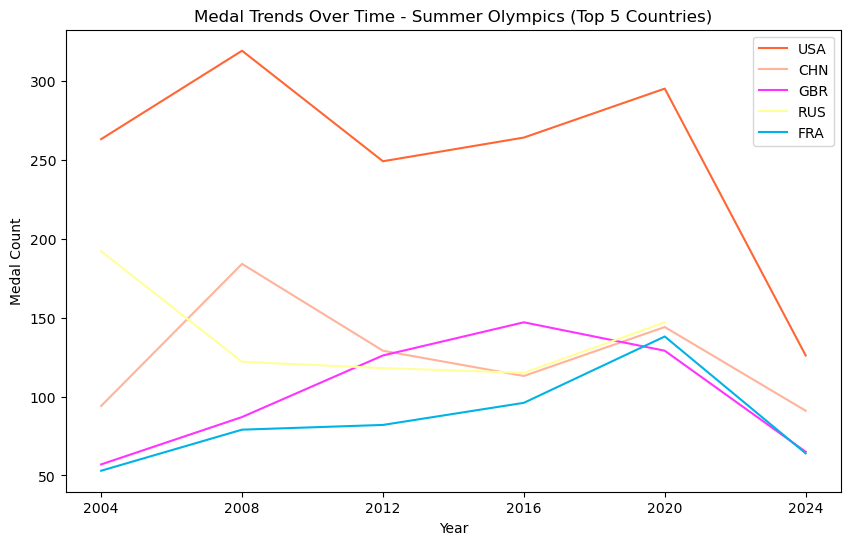

In [237]:
# Plot medal trends over time for the top 5 Summer countries

top_5_summer = summer_medal_counts.head(5)['noc'].tolist()
plt.figure(figsize=(10, 6))

for country in top_5_summer:
    country_data = summer_trends[summer_trends['noc'] == country]
    plt.plot(country_data['year'], country_data['medal'], label=country, color=color_dict[country])

plt.title('Medal Trends Over Time - Summer Olympics (Top 5 Countries)')
plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.xticks(summer_trends['year'].unique())
plt.legend()
plt.show()


The graph shows the medal trends of the top 5 countries in the Summer Olympics over time. The **USA** has consistently **won the most medals**, with a peak in 2008. **China** has been **steadily increasing** their medal count, while the UK has seen a slight decline between 2016 and 2020.. **Russia has had a more inconsistent performance**, but was on the rise in 2020 before declining. **France's** medal count has been slowly but **steadily increasing.**

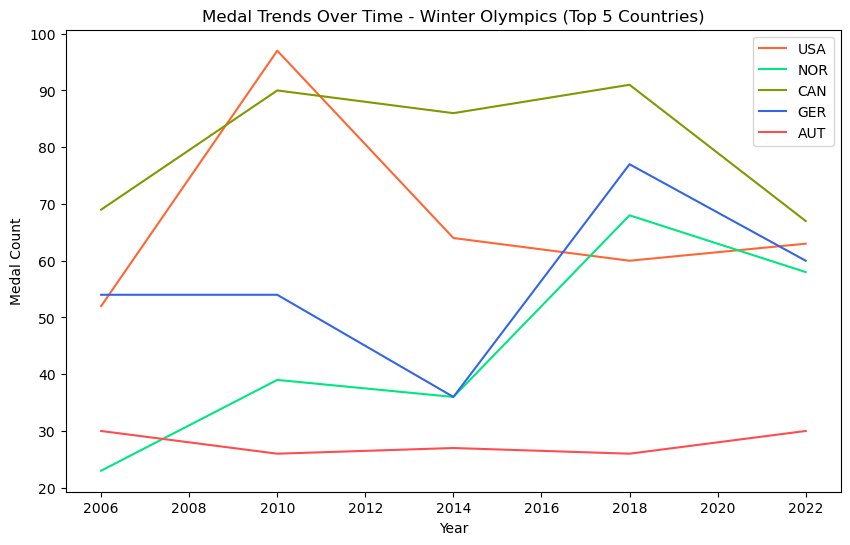

In [239]:
# Plot medal trends over time for the top 5 Winter countries
top_5_winter = winter_medal_counts.head(5)['noc'].tolist()
plt.figure(figsize=(10, 6))
for country in top_5_winter:
    country_data = winter_trends[winter_trends['noc'] == country]
    plt.plot(country_data['year'], country_data['medal'], label=country, color=color_dict[country])

plt.title('Medal Trends Over Time - Winter Olympics (Top 5 Countries)')
plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.legend()
plt.show()

The graph shows the medal trends over time for the **top 5 countries in the Winter Olympics**. The **USA** is consistently in the** lead**, followed by Norway, Canada, Germany, and Austria. The **USA experienced a peak in 2010**, while **Canada reached its peak in 2018**. **Germany's** performance has been more consistent, with a **steady decline from its peak in 2018**. **Austria** has maintained a relatively **steady performance**, while **Norway has shown a gradual increase in its medal count** over the years.
Overall, the graph reveals the competitive landscape of Winter Olympics, highlighting the dominance of the USA and the steady growth of Norway.

The top 10 countries with the most medals in the last 20 years have not only been identified but also reveal the insights that inform further 
exploration into what makes these nations so successful and how emerging countries can learn from their strategies to claim their place on the
Olympic podium.